<a href="https://colab.research.google.com/github/hargurjeet/LJMU_Thesis/blob/main/adhoc_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hargurjeet/LJMU_Thesis.git
!pip install sentence_transformers

Cloning into 'LJMU_Thesis'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 108 (delta 57), reused 9 (delta 3), pack-reused 0
Receiving objects: 100% (108/108), 464.56 KiB | 5.28 MiB/s, done.
Resolving deltas: 100% (57/57), done.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Us

In [9]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report
import numpy as np
from sentence_transformers import SentenceTransformer
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
df_open_ai = pd.read_csv("/content/LJMU_Thesis/Processed_output/openai_generated_output.csv")
df_open_ai.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,TextualData
0,34,No,Middle Income,6,No,Yes,0,The customer is 34 years old and has indicated...
1,34,Yes,Low Income,5,Yes,No,1,The customer is aged 34 and is a frequent flye...
2,37,No,Middle Income,3,Yes,No,0,The customer is 37 years old and is not a freq...
3,30,No,Middle Income,2,No,No,0,The customer is aged 30 and is not a frequent ...
4,30,No,Low Income,1,No,No,0,"The customer is 30 years old, does not frequen..."


In [5]:
def get_embedding(text):
    # Generate and return the embedding using the Sentence Transformer model
    embedding = model.encode(text, convert_to_tensor=True)  # Optional: convert_to_tensor=True returns a PyTorch tensor
    return embedding

df_open_ai['Embedding'] = df_open_ai['TextualData'].apply(get_embedding)

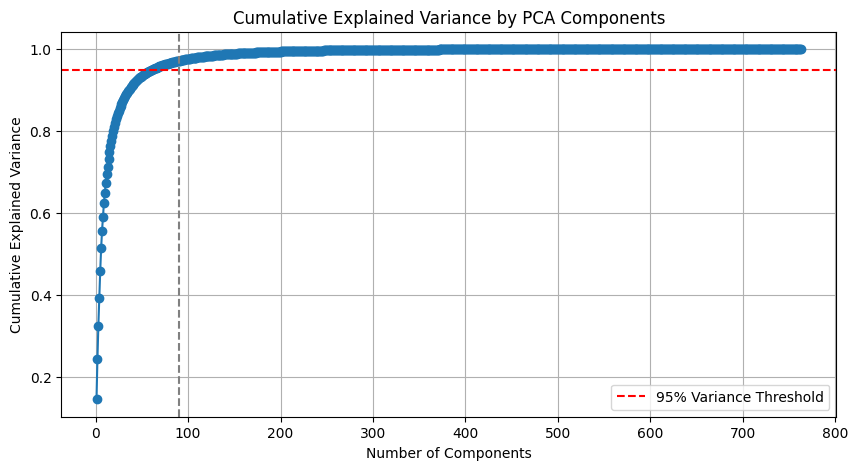

In [14]:
import matplotlib.pyplot as plt
# Prepare data
X = df_open_ai['Embedding'].tolist()
y = df_open_ai['Target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the embeddings
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA and determine the explained variance
pca = PCA()
pca.fit(X_train)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=90, color='gray', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [11]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_open_ai['Embedding'].tolist(),
    df_open_ai['Target'],
    test_size=0.2,
    random_state=42
)

# Standardize the embeddings
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality Reduction with PCA
# pca = PCA(n_components=min(len(X_train), X_train.shape[1]))
pca = PCA(n_components=90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       153
           1       1.00      0.03      0.05        38

    accuracy                           0.81       191
   macro avg       0.90      0.51      0.47       191
weighted avg       0.84      0.81      0.72       191



## without reducing dimensionality

In [15]:
X = df_open_ai['Embedding'].tolist()
y = df_open_ai['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Generate classification report for more metrics
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       153
           1       0.78      0.18      0.30        38

    accuracy                           0.83       191
   macro avg       0.80      0.59      0.60       191
weighted avg       0.82      0.83      0.78       191



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Create a Random Forest Classifier with class weights
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Set a lower threshold to increase recall
threshold = 0.3  # Experiment with different thresholds
y_pred = (y_pred_proba >= threshold).astype(int)

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Improved Recall: {recall:.2f}")

Improved Recall: 0.47


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.41      0.47      0.44        38

    accuracy                           0.76       191
   macro avg       0.64      0.65      0.64       191
weighted avg       0.77      0.76      0.77       191



Threshold: 0.1, Recall: 0.95
Threshold: 0.2, Recall: 0.76
Threshold: 0.3, Recall: 0.47
Threshold: 0.4, Recall: 0.29
Threshold: 0.5, Recall: 0.21
Threshold: 0.6, Recall: 0.13
Threshold: 0.7, Recall: 0.08
Threshold: 0.8, Recall: 0.00
Threshold: 0.9, Recall: 0.00


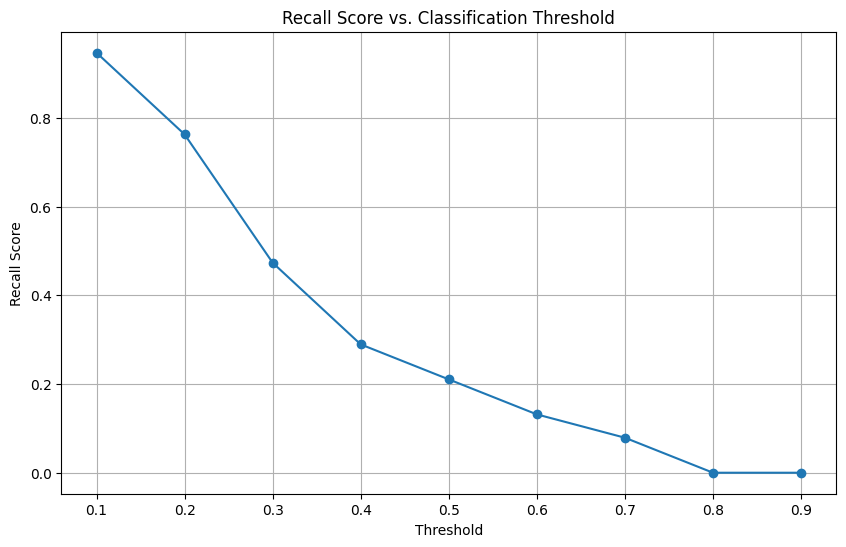

In [18]:
import numpy as np
from sklearn.metrics import recall_score

# Assuming y_pred_proba is already calculated from your model
# y_pred_proba = clf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)  # Generates thresholds from 0.1 to 0.9
recall_scores = []

for threshold in thresholds:
    # Predicting with the current threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

    # Print the threshold and corresponding recall score
    print(f"Threshold: {threshold:.1f}, Recall: {recall:.2f}")

# Optional: Visualize recall scores against thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores, marker='o')
plt.title('Recall Score vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall Score')
plt.xticks(thresholds)
plt.grid()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Create a Random Forest Classifier with class weights
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Set a lower threshold to increase recall
threshold = 0.3  # Experiment with different thresholds
y_pred = (y_pred_proba >= threshold).astype(int)

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Improved Recall: {recall:.2f}")

print(classification_report(y_test, y_pred))

Improved Recall: 0.47
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.41      0.47      0.44        38

    accuracy                           0.76       191
   macro avg       0.64      0.65      0.64       191
weighted avg       0.77      0.76      0.77       191



In [25]:
from sklearn.model_selection import StratifiedKFold

# Assuming df_open_ai is your DataFrame containing the data
X = df_open_ai['Embedding'].tolist()  # List of embeddings
y = df_open_ai['Target'].values  # Target labels

# Create a Stratified K-Fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set your threshold
threshold = 0.3

# Initialize lists to store all the predictions and true labels
all_y_pred = []
all_y_true = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Get probabilities for the positive class
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Apply the fixed threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Store predictions and true labels for the final report
    all_y_pred.extend(y_pred)
    all_y_true.extend(y_test)

# Calculate average recall across folds
# Generate the final classification report after all folds
print("=== Final Classification Report ===")
print(classification_report(all_y_true, all_y_pred))

=== Final Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       730
           1       0.48      0.47      0.48       224

    accuracy                           0.76       954
   macro avg       0.66      0.66      0.66       954
weighted avg       0.76      0.76      0.76       954

